# <center>Laboratorium 10<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, uzupełnić plik main.py, wykonać test na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

***Materiały przygotowujące:***


In [7]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
from numpy.polynomial import polynomial as P

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych lub inaczej mówiąc metodami znajdowania miejsc zerowych funkcji.
W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$, należy wyznaczyć argumenty funkcji $x$, dla których $f(x) = 0$ (funkcja jest równa zero). 

Argumenty $x^*$, dla których $f(x)=0$ nazywamy *pierwiastkami*.

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Dany jest wielomian postaci $W(x)=(x-1)(x-2)\cdot \ldots \cdot (x-20)$.

1. Zdefinuj funkcję *polly_A*, która obliczy współczynniki wielomianu $a_i$ w postaci ogólnej wielomianu $w(x)=a_nx^n+\ldots +a_2x^2+a_1x+1$. Skonstruuj wektor tych współczynników. Użyj funkcji [polyfromroots](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polynomial.polynomial.polyfromroots.html#numpy.polynomial.polynomial.polyfromroots) oraz *linspace*.
2. Zdefinuj funkcję *roots_20*, która w pętli 20 iteracji będzie:  

   i. konstruować wektor współczynników nowego wielomianu w następujący sposób: do każdego wygenerowanego wektora współczynników dodać losową wartość w postaci $(10^{-10})N(0,1)$. Użyj funkcji [random_sample](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample).  
  ii. wyliczyać pierwiaski tego wielomianu za pomocą metody [polyroots](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyroots.html#numpy.polynomial.polynomial.polyroots).

3. Narysuj na wykresie te pierwiastki (w każdej iteracji dorysowywać pierwiastki na tym samym rysunku).
4. Określić, który pierwiastek jest najbardziej wrażliwy na zaburzenia.
5. Zaproponować sposób oszacowania uwarunkowania każdego z pierwiastków.

<ipython-input-8-9f61fbfd8cb1>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  new_poly[0], new_roots[0] = main.roots_20(root)
<ipython-input-8-9f61fbfd8cb1>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  new_poly[i],new_roots[i] = main.roots_20(new_poly[i-1])


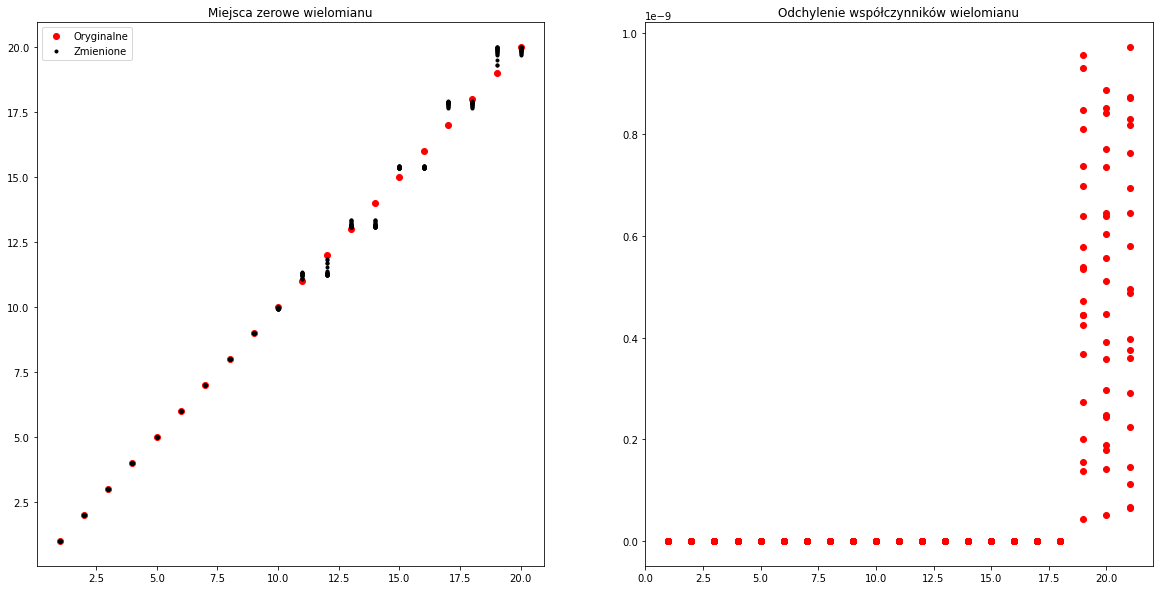

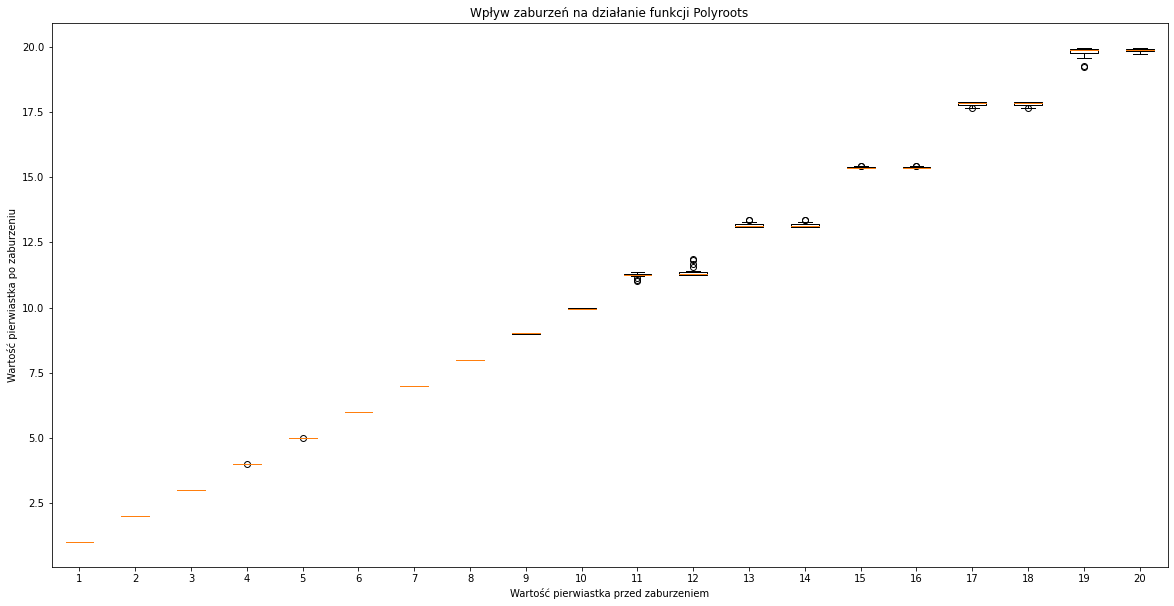

In [8]:
x = np.linspace(1, 20, 20)
root = main.polly_A(x)

counter = len(x)

new_poly = np.zeros((counter, len(root)))
new_roots = np.zeros((counter, len(x)))

new_poly[0], new_roots[0] = main.roots_20(root)

for i in range(1, counter):
     new_poly[i],new_roots[i] = main.roots_20(new_poly[i-1])


fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

x_roots = np.arange(1, len(x)+1)
x_poly = np.arange(1, len(root)+1) 
ax1.plot(x, x, 'ro')
for i in range(counter):
    ax1.plot(x_roots, new_roots[i], 'k.')
    ax2.plot(x_poly, abs(new_poly[i] - root), 'ro')


ax1.set_title("Miejsca zerowe wielomianu")
ax2.set_title("Odchylenie współczynników wielomianu")
ax1.legend(["Oryginalne", "Zmienione"])

plt.show()

x = np.linspace(1, 20, 20)
root = main.polly_A(x)

iter_roots = []
for i in range(20):
    samp, samp_roots = main.roots_20(root)
    iter_roots.append(samp_roots)
    root = samp
    
iter_roots = np.array(iter_roots)

plt.figure(figsize=(20, 10))
plt.boxplot(np.real(iter_roots))
plt.title("Wpływ zaburzeń na działanie funkcji Polyroots")
plt.ylabel("Wartość pierwiastka po zaburzeniu")
plt.xlabel("Wartość pierwiastka przed zaburzeniem")
plt.show()

1. Pierwiastki od 1 do 9 są odporne na zaburzenia. Nie występuje wśród nich żaden rozrzut.
2. Miejsca zerowe od 13 w górę występują parami i są identyczne. Wynika to stąd, że zaburzenie pierwiastków zostało spowodowane przez powstanie sprzężonych par zespolonych.
3. Najbardziej wrażliwy na zakłócenia wydaje się być pierwiastek 19.

***Zadanie 2.***  
Dany jest wielomian $w_1(x)=(x-1)^8$. Wyznacz numerycznie miejsca zerowego tego wielomianu poprzez wyznaczenie wartości własnych macierzy Frobeniusa. W związku z tym wykonaj następujące czynności:  

1. Zaiplementuj funkcję tworzącą [macierz Frobenusa](https://github.com/KAIR-ISZ/public_lectures/blob/master/Metody%20Numeryczne%202019/Lecture%204%20(nonlinear%20equations)/Metody%20numeryczne%202019%20-%20R%C3%B3wnania%20nieliniowe.pdf) *frob_a*, dla zadanego wektora współczynników wielomianu $w(x)$.  
2. Wyznacz wartości własne przekształconej macierzy za pomocą funkcji [eigvals](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html#numpy.linalg.eigvals).  
3. Dokonaj rozkładu Schura macierzy zdefiniowanej w punkcie 1. użyj funkcji [schure](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.schur.html#scipy.linalg.schur).  
4. Porównaj wyniki z funkcją polyroots.

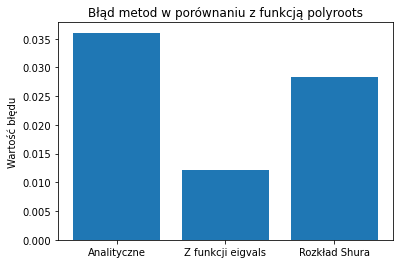

In [9]:
W = np.ones(8)
poly = main.polly_A(W)

frob, eig, shur, roots = main.frob_a(poly[:-1])

x = np.arange(3)
plroots = np.sort(P.polyroots(poly))
error = [np.linalg.norm(plroots - W), np.linalg.norm(plroots - np.sort(eig)), np.linalg.norm(plroots - np.sort(np.diag(shur[0])))]

plt.bar(x, error)
plt.xticks(x, ('Analityczne', 'Z funkcji eigvals', 'Rozkład Shura'))
plt.title("Błąd metod w porównaniu z funkcją polyroots")
plt.ylabel("Wartość błędu")
plt.show()

Największą wartość błędu uzyskujemy dla metody analitycznej, a najmniejszą dla funkcji eigvals

***Zadanie 3.***  
Dla danego wielomianu $w_2(x) = 243x^7-486x^6+783x^5-990x^4+558x^3-28x^2-72x+16$ wyznacz miejsca zerowe numerycznie, w taki sam sposób jak w zadaniu 2.


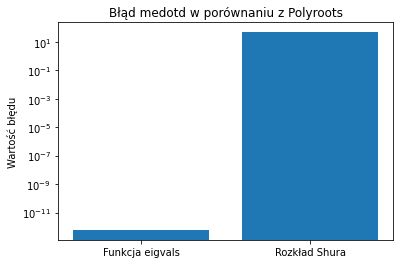

In [10]:
W = np.array([16, -72, -28, 558, -990, 783, -486, 243]) 
poly = W/243
poly = main.polly_A(W)

frob_matrix, eig, shur, poly_from = main.frob_a(poly[:-1])

shur = scipy.linalg.schur(frob_matrix, output='complex')

x = np.arange(2)
roots = np.sort(P.polyroots(poly))
error = [np.linalg.norm(roots - np.sort(eig)), np.linalg.norm(roots - np.sort(np.diag(shur[0])))]

plt.bar(x, error)
plt.xticks(x, ('Funkcja eigvals', 'Rozkład Shura'))
plt.title("Błąd medotd w porównaniu z Polyroots")
plt.ylabel("Wartość błędu")
plt.yscale('log')
plt.show()

W tym przypadku także funkcja eigvals ma o wiele mniejszą wartość błędu w porównaniu do rozkładu Shura.

***Zadanie 4.***

Dany jest wielomian: 
$$
w_3(x)= x^5 - 156x^4 - 5x^3 + 780x^2 + 4x - 624
$$.
 Wiedząc, że wielomian ten w postaci szeregu Czebyszewa jest następujący 
 $$w_3(x)= (a_0+\frac{a_2}{2}+ \frac{3a_4}{4})T_0(x)+(a_1+\frac{3a_3}{4}+ \frac{5a_5}{8})T_1(x)+(\frac{a_2}{2}+ \frac{a_4}{4})T_2(x)+(\frac{a_3}{4}+ \frac{5a_5}{16})T_3(x)+ (\frac{a_4}{8})T_4 + (\frac{a_5}{16})T_5(x)$$ 
 znajdź pierwiastki wykorzystując funkcję [chebroots](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebroots.html).

In [11]:
w_3 = [1, -156, -5, 780, 4, -624]

a0 = w_3[0] + w_3[2]/2 + 3*w_3[4]/4
a1 = w_3[1] + 3*w_3[3]/4 + 5*w_3[5]/8
a2 = w_3[2]/2 + w_3[4]/4
a3 = w_3[3]/4 + 5*w_3[5]/16
a4 = w_3[4]/8
a5 = w_3[5]/16

wspolczynniki = [a0, a1, a2, a3, a4, a5]
roots = np.polynomial.chebyshev.chebroots(wspolczynniki)

print('Pierwiastki wielomianu wyznaczone przy użyciu funkcji chebroots:')
print(roots)      

Pierwiastki wielomianu wyznaczone przy użyciu funkcji chebroots:
[-0.99946576 -0.50825851  0.02246995  0.49113043  1.00053414]
